##### Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

##### Importing data

In [89]:
data=pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


##### Checking Keys

In [90]:
data.keys()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

##### Checking shape

In [91]:
data.shape

(4177, 9)

In [92]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

##### Checking Datatype

In [93]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

##### Printing the Info

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


##### Checking for null value

In [95]:
data.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


##### Checking for number of null values

In [96]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

##### Drawing the heatmap

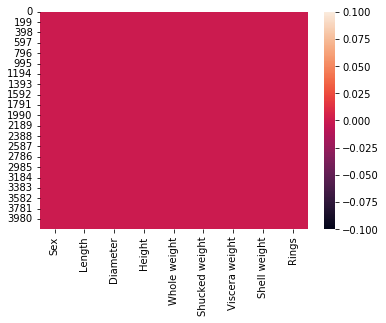

In [97]:
sns.heatmap(data.isnull())

##### Describing the data

In [98]:
data.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


##### Checking the skewness of the data

In [99]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

##### Plotting the scatter graph of height with rings (Output variable)

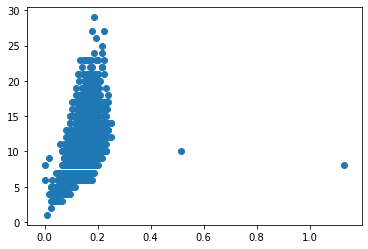

In [100]:
plt.scatter(data['Height'],data['Rings'])
plt.show()

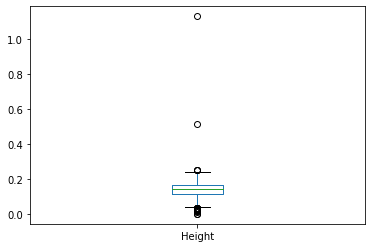

In [101]:
data['Height'].plot.box()

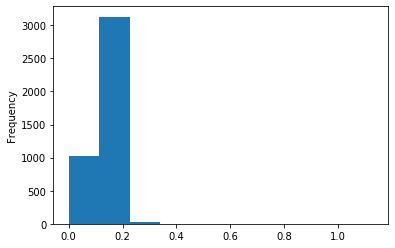

In [102]:
data['Height'].plot.hist()

##### Converting the data from str to int

In [103]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data = data.apply(label_encoder.fit_transform)

##### Checking for the outliers

In [104]:
# removing outliers

from scipy.stats import zscore
z=np.abs(zscore(data['Height']))
z

array([1.14805951, 1.27780638, 0.11008449, ..., 1.70637178, 0.27915614,
       1.44687803])

In [105]:
threshold=3
print(np.where(z>3))

(array([ 236,  694, 1174, 1257, 2051, 2169, 3902, 3996], dtype=int64),)


In [106]:
data.skew()

Sex              -0.098155
Length           -0.636399
Diameter         -0.607999
Height           -0.255142
Whole weight      0.077305
Shucked weight    0.236225
Viscera weight    0.364429
Shell weight      0.135640
Rings             1.108353
dtype: float64

##### Plotting the pair plot with seaborn

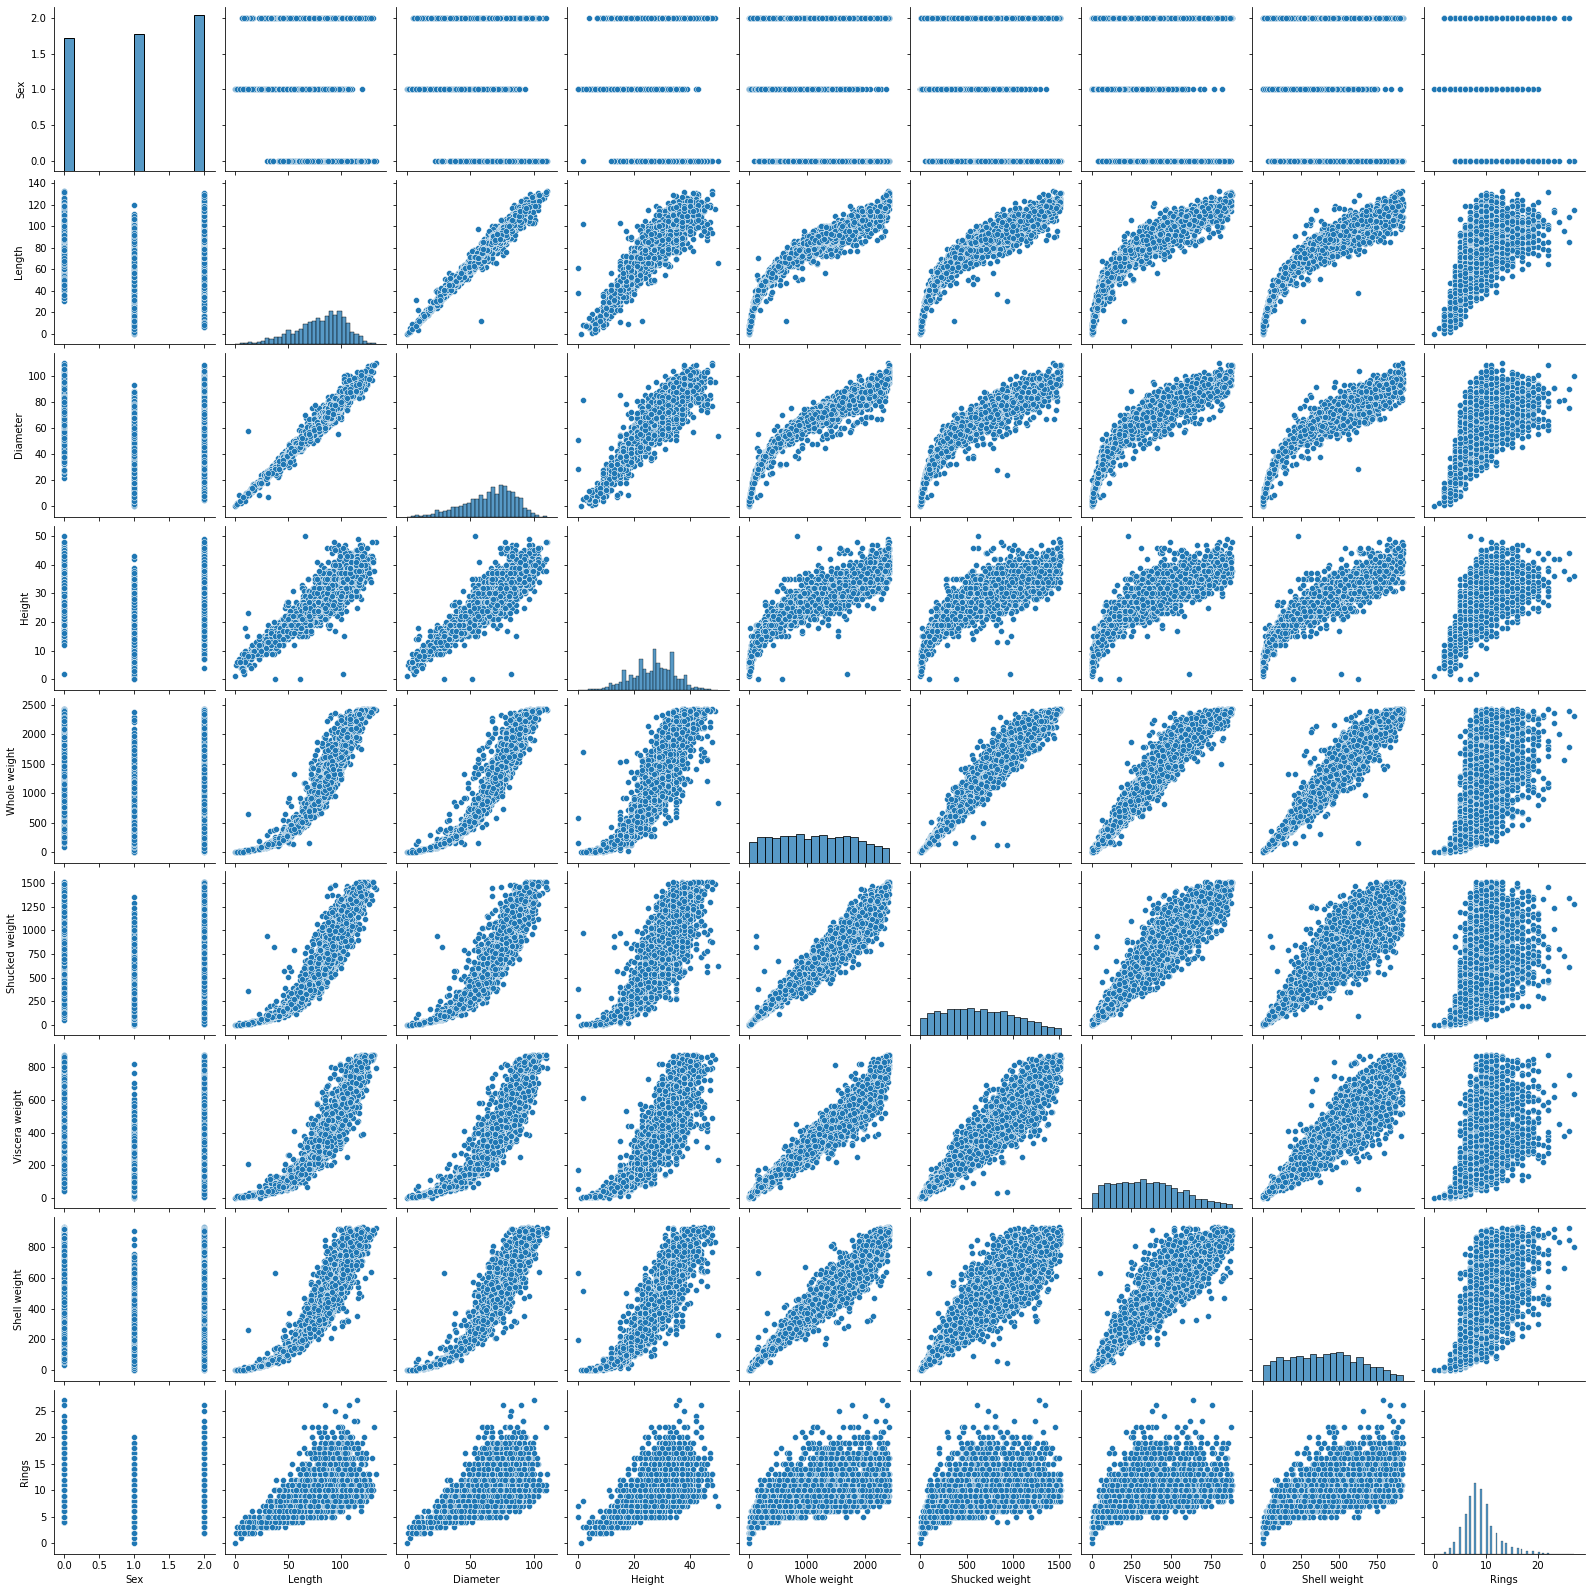

In [107]:
sns.pairplot(data)

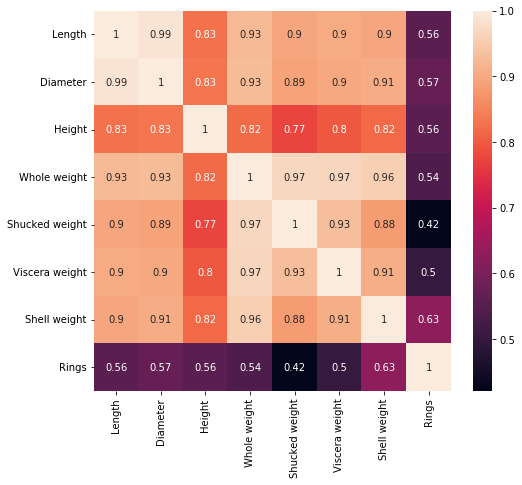

In [40]:
data_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(data_hmap,annot=True)
plt.show()

##### Dividing the data into input and output variable

In [129]:
x=data.iloc[:,:8].values

In [131]:
from sklearn.preprocessing import StandardScaler
x_features = x
x= StandardScaler().fit_transform(x)

In [132]:
print(x)

[[ 1.15198011 -0.57514482 -0.43232856 ... -0.62848601 -0.74055949
  -0.65546208]
 [ 1.15198011 -1.45029839 -1.44044354 ... -1.24994198 -1.24207391
  -1.30958261]
 [-1.28068972  0.04996488  0.12213469 ... -0.46467125 -0.35367695
  -0.17141288]
 ...
 [ 1.15198011  0.63340059  0.67659793 ...  0.87184913  1.03623442
   0.59608854]
 [-1.28068972  0.84177049  0.77740943 ...  0.9004517   0.78308905
   0.50887247]
 [ 1.15198011  1.55022814  1.48308992 ...  2.0861585   1.80522318
   1.74297987]]


In [133]:
y=data.iloc[:,-1].values

In [134]:
print(y)

[14  6  8 ...  8  9 11]


##### Checking the shape of x and y

In [135]:
x.shape

(4177, 8)

In [136]:
y.shape

(4177,)

##### Splitting the data into train and test split

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

##### Printing the values of Train and Test Data

In [138]:
x_train

array([[-1.28068972,  1.13348835,  0.87822093, ...,  1.67532149,
         1.61417007,  1.21096184],
       [ 1.15198011, -0.86686268, -0.63395155, ..., -0.87550825,
        -0.78832277, -0.82553341],
       [ 1.15198011,  0.34168273,  0.27335194, ...,  0.02157254,
         0.24814035,  0.61353175],
       ...,
       [-0.0643548 , -0.95021064, -0.9867918 , ..., -0.93531364,
        -1.12266571, -1.13951127],
       [-1.28068972,  0.46670467,  0.32375768, ...,  0.08397816,
        -0.14351853,  0.09459613],
       [-0.0643548 , -0.95021064, -0.7851688 , ..., -0.99251879,
        -0.99848119, -0.98688314]])

In [139]:
x_test

array([[-0.0643548 , -1.15858053, -1.1884148 , ..., -1.24734174,
        -1.12266571, -1.1831193 ],
       [ 1.15198011,  0.0082909 , -0.07948831, ..., -0.33465954,
        -0.17217649, -0.04931038],
       [-0.0643548 ,  0.13331284,  0.22294619, ...,  0.22179058,
        -0.05754463, -0.01878476],
       ...,
       [-1.28068972,  0.88344447,  0.72700368, ...,  0.99666037,
         0.93593154,  1.18915782],
       [ 1.15198011, -0.15840502, -0.07948831, ..., -0.37886352,
        -0.18650548,  0.1774514 ],
       [ 1.15198011,  0.42503069,  0.27335194, ...,  0.09177887,
         0.41531182,  0.69202622]])

In [140]:
y_train

array([ 9,  6, 19, ...,  5, 11,  6], dtype=int64)

In [141]:
y_test

array([ 5,  8,  8, 11,  9,  6,  7,  8,  9,  3,  3,  9, 11,  7,  7,  6,  9,
        3, 10,  7, 16, 11, 10,  4,  8,  9,  8,  9,  2,  7,  9,  5, 10,  9,
        8, 10,  8,  7, 11,  7,  7, 11,  9,  7, 10,  3, 10, 10,  5,  8, 19,
        5,  5,  7,  8,  8,  6, 10,  7, 12,  8, 10,  4,  7, 10,  5,  4, 12,
       10, 12,  8,  5, 10, 14,  5,  9,  6,  7,  5, 11, 14,  8,  9,  8,  6,
        6,  4, 12, 12, 12,  7, 10, 10,  9,  8,  6, 12, 10,  7,  7, 15, 12,
        9,  6,  5, 12,  5,  9, 12,  7, 10,  7, 10,  8, 10,  9,  3,  6, 10,
       18,  7, 11, 13,  8, 17, 11,  9,  4, 12,  9,  8, 11,  6, 14, 10, 13,
        6,  8, 12, 13,  8,  7,  9, 13,  7,  9,  7,  5,  7,  5,  8,  9, 11,
       11,  8,  6,  7, 10,  9,  7,  5,  7,  3,  7, 12,  6,  7,  8,  8,  8,
        6, 11,  7,  6,  8,  7, 11,  3, 12,  9, 11,  4, 11,  9,  7,  8,  8,
        3, 17, 12,  9,  6, 13, 11,  9,  9,  5,  6, 10, 10, 14,  7,  8, 10,
       11,  7, 18,  6,  4,  9,  8, 12, 18, 12,  7,  5,  6, 10,  5, 10,  8,
        3,  5, 12,  8,  8

##### Plotting the heatmap

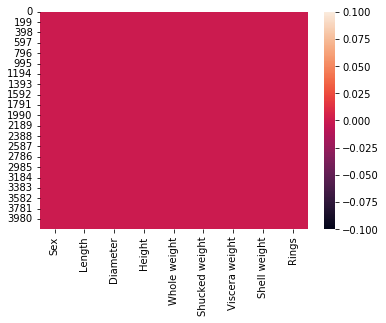

In [142]:
sns.heatmap(data.isnull())

##### Fitting the 1st Model with Linear Regression

In [144]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [146]:
model1.score(x_train,y_train)

0.5386047759291888

In [147]:
model1.score(x_test,y_test)

0.5731610787031214

In [148]:
y_pred1=model1.predict(x_test)

##### Identifying the r2 score

In [149]:
r2_score(y_test,y_pred1)

0.5731610787031214

##### Checking for the errors

In [160]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred1)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  4.6533123000836865
root mean squared error is :  2.1571537497553774


##### Fitting the 2nd Model with Decision Tree Regression

In [150]:
from sklearn.tree import DecisionTreeRegressor

model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [151]:
model2.score(x_train,y_train)

1.0

In [152]:
model2.score(x_test,y_test)

0.09862999171569165

In [153]:
y_pred2=model1.predict(x_test)

##### Identifying the r2 score

In [154]:
r2_score(y_test,y_pred2)

0.5731610787031214

##### Predicting the Errors

In [161]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred2)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  4.6533123000836865
root mean squared error is :  2.1571537497553774


##### Fitting the 3rd Model with SVR

In [155]:
from sklearn.svm import SVR

model3=SVR()
model3.fit(x_train,y_train)

SVR()

In [156]:
model3.score(x_train,y_train)

0.5410220705348547

In [157]:
model3.score(x_test,y_test)

0.5728778316100123

In [158]:
y_pred3=model1.predict(x_test)

##### Identifying the r2 score

In [159]:
r2_score(y_test,y_pred3)

0.5731610787031214

In [162]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred3)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  4.6533123000836865
root mean squared error is :  2.1571537497553774


##### Loading and saving the model

In [176]:
import pickle

In [177]:
with open('model2_pkl','wb') as files:
    pickle.dump(model2, files)